# Análise preliminar dos dados brutos do IRFCL

In [1]:
import pandas as pd 
irfcl = pd.read_csv('IRFCL.csv')

### Quais colunas nós temos?

In [2]:
irfcl.columns

Index(['COUNTRY', 'INDICATOR', 'SECTOR', 'FREQUENCY', 'TIME_PERIOD', 'value',
       'index'],
      dtype='object')

### Quais são os tipode de dados de cada coluna?

In [3]:
display(irfcl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107805 entries, 0 to 107804
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COUNTRY      107805 non-null  object 
 1   INDICATOR    107805 non-null  object 
 2   SECTOR       107805 non-null  object 
 3   FREQUENCY    107805 non-null  object 
 4   TIME_PERIOD  107805 non-null  object 
 5   value        107805 non-null  float64
 6   index        0 non-null       float64
dtypes: float64(2), object(5)
memory usage: 5.8+ MB


None

Objetos do tipo object indicam que eles podem ser de qualquer tipo, isso não é bom. É necessário ser tratado da bronze para a silver!

### Qual o shape da nossa tabela (linhas x colunas)?

In [4]:
irfcl.shape

(107805, 7)

*Resumo Inicial*:

É uma tabela que possui 107.805 linhas e 7 colunas, sendo elas:
1. 'COUNTRY'
2. 'INDICATOR'
3. 'SECTOR'
4. 'FREQUENCY'
5. 'TIME_PERIOD'
6. 'value',
7. 'index'

- Além disso, podemos ver que a coluna 'index' todos os itens são nulos e sobre os tipos de dados,

    - Todas as colunas são do tipo object exceto 'value' e 'index' que são do tipo float


### Percentual de nulos por país

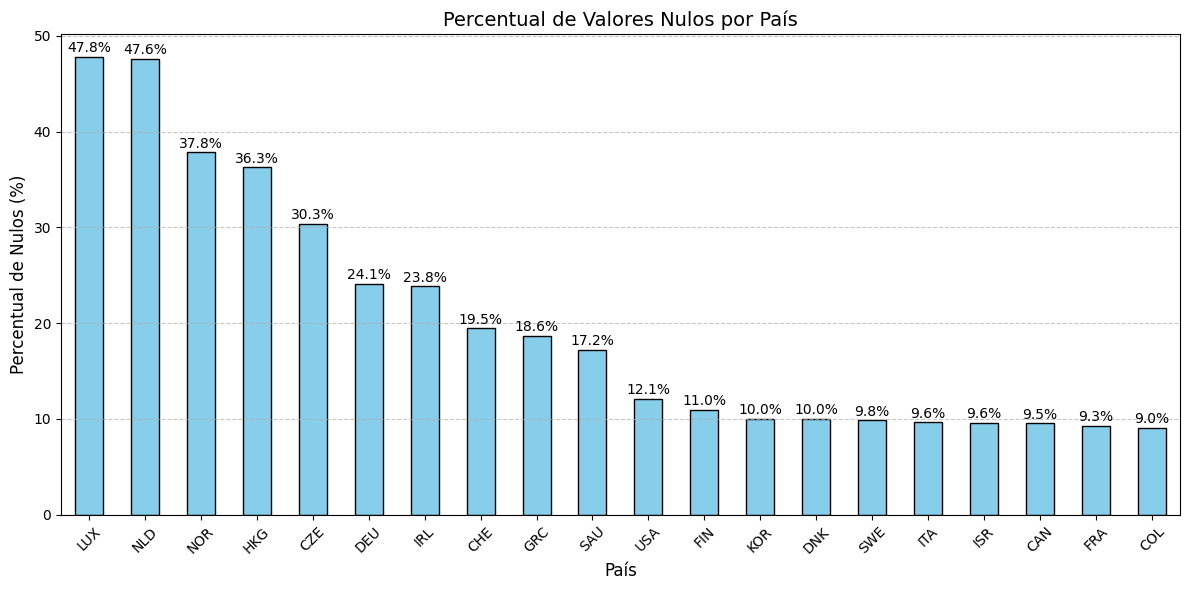

In [17]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

nulos = irfcl.replace(0, np.nan) # Trocando os valores zero por nulo
nulos = nulos[nulos['SECTOR'] == 'S1XS1311']

percentual_nulos = (
    nulos.groupby('COUNTRY')['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .sort_values(ascending=False)
    .head(20)
)


# Adicionando os valores no topo de cada barra
for index, value in enumerate(percentual_nulos):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)


percentual_nulos.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Percentual de Valores Nulos por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Percentual de Nulos (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Análise descritiva dos dados

- O método describe originalmente faz a análise apenas das colunas numéricas:

In [28]:
irfcl.describe()

,value,index
count,1.078050e+05,0.0
mean,3.049472e+10,NaN
std,1.631177e+11,NaN
min,-5.527280e+11,NaN
25%,-1.703486e+08,NaN
50%,0.000000e+00,NaN
75%,7.398400e+09,NaN
max,3.959505e+12,NaN


- Aqui teremos uma análise descritiva das colunas que não são numéricas

In [29]:
irfcl.describe(exclude='number')

,COUNTRY,INDICATOR,SECTOR,FREQUENCY,TIME_PERIOD
count,107805,107805,107805,107805,107805
unique,45,24,3,1,102
top,BEL,IRFCLDT2_USD_IRFCL13,S1XS1311,Q,2016-Q1
freq,7187,5343,83365,107805,1201


### Análise do describe

Aqui podemos decobrir algumas informações importantes:

- Estamos com dados de 45 países
- Tem 24 indicadores diferentes sendo analisados ao todo
- Estamos com dados de frequência trimestral

- Não podemos chegar em nenhuma conclusão sobre os valores numéricos, pois como temos 24 indicadores, os valores variam muito de acordo com o indicador


# O que mais podemos descobrir?

1. Quais são esses países?
2. Quais são esses 24 indicadores?
3. Todos os países tem os 24 indicadores com valores não nulos?
4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?
5. Como fica o gráfico da comparação dos países com cada indicador?

#### 1. Quais são os países?

In [30]:
irfcl.COUNTRY.unique()

array(['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'CAN',
       'AUS', 'KOR', 'ESP', 'NLD', 'IRL', 'CHE', 'LUX', 'SWE', 'DNK',
       'FIN', 'POL', 'BEL', 'CZE', 'HUN', 'ROU', 'PRT', 'GRC', 'BRA',
       'MEX', 'ARG', 'COL', 'CHL', 'PER', 'URY', 'SGP', 'HKG', 'THA',
       'MYS', 'IDN', 'PHL', 'SAU', 'ISR', 'NOR', 'RUS', 'ZAF', 'EGY'],
      dtype=object)

#### 2. Quais são os indicadores?

In [31]:
irfcl.INDICATOR.unique()

array(['IRFCLDT1_IRFCL65_USD_IRFCL13', 'IRFCLDT1_IRFCL54_USD_IRFCL13',
       'IRFCLDT1_IRFCL56_USD_IRFCL13', 'IRFCLDT1_IRFCL57_USD_IRFCL13',
       'IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13',
       'IRFCLDT1_IRFCL32_USD_IRFCL13', 'IRFCLDT1_IRFCLCDCFC_USD_IRFCL13',
       'IRFCLDT2_USD_IRFCL13', 'IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13',
       'IRFCLDT2_IRFCL24_SM1MUT3M_USD_IRFCL13',
       'IRFCLDT2_IRFCL24_SM3MUTY_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SUTM_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SM1MUT3M_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL26_SM3MUTY_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SUTM_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SM1MUT3M_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL151_SM3MUTY_FO_USD_IRFCL13',
       'IRFCLDT2_IRFCL1_SUTM_IN_LP_USD_IRFCL13',
       'IRFCLDT2_IRFCL1_SUTM_SHP_USD_IRFCL13',
       'IRFCLDT4_IRFCLU97_A_USD_IRFCL13',
       'IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13',
       'IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13',
       'IRFCLDT4_IRFCL68_USD_IRFCL13', 'I

#### 3. Todos os países tem os 24 indicadores com valores não nulos?

Queremos identificar quais indicadores de cada país que tem valores nulos


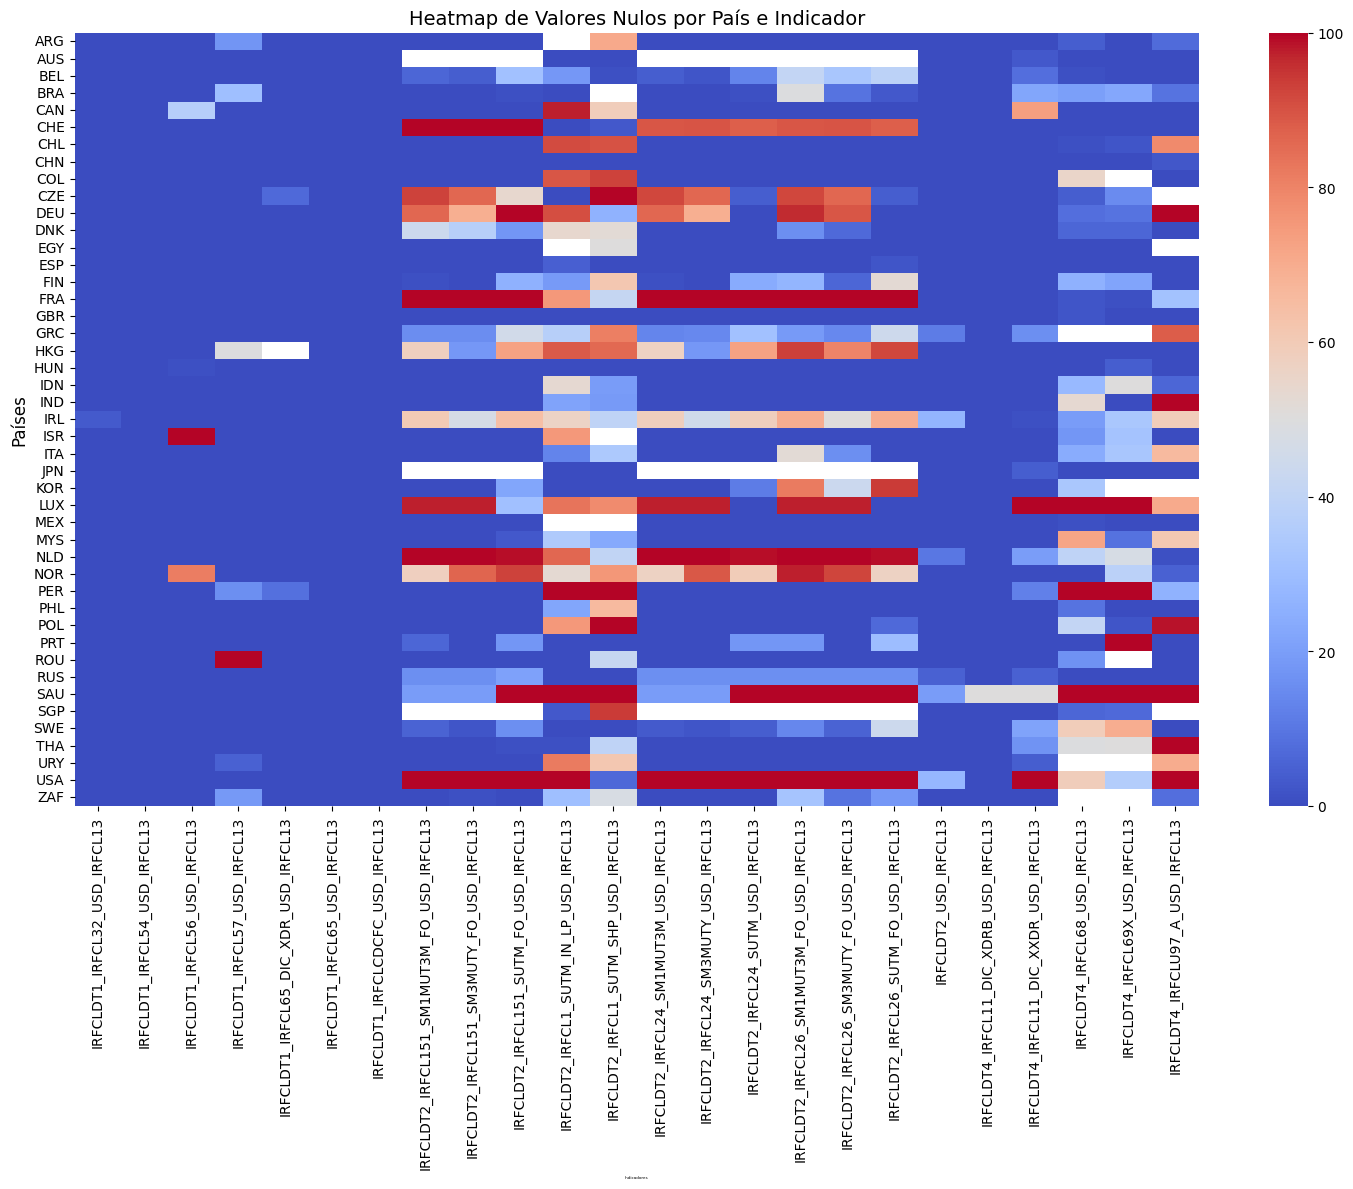

In [ ]:
import numpy as np 
import seaborn as sns

irfcl_null = irfcl.replace(0, np.nan) # Trocando os valores zero por nulo
irfcl_null = irfcl_null[irfcl_null['SECTOR'] == 'S1XS1311']

percentual_nulos = (
    irfcl_null.groupby(['COUNTRY', 'INDICATOR'])['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .sort_values(ascending=False)
)
# Reshape para formato de matriz
pivot_nulos = percentual_nulos.reset_index().pivot(index='COUNTRY', columns='INDICATOR', values='value')

# Plotando o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_nulos, cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap de Valores Nulos por País e Indicador', fontsize=14)
plt.xlabel('Indicadores', fontsize=3)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


#### 4. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?



In [33]:
print(irfcl_null['TIME_PERIOD'].min())
print(irfcl_null['TIME_PERIOD'].max())

2000-Q1
2025-Q2


Estamos trabalhando com dados do período do primeiro trismestre de 2000 até o segundo trimestre de 2025!

#### 5. Como fica o gráfico da comparação dos países com cada indicador?

## Regras de Negócio, aqui estão os principais indicadores:

1. **Reservas oficiais (total)** — `IRFCLDT1_IRFCL65_USD_IRFCL13`

   * **Por quê:** headline do “pulmão” em FX.
   * **Leitura:** nível e tendência.
   * **Sinal:** queda rápida ou patamar baixo.

2. **Drenagens líquidas de curto prazo (total)** — `IRFCLDT2_USD_IRFCL13`

   * **Por quê:** concentra o risco de **saídas previstas** no curto prazo.
   * **Leitura:** sempre em **razão** com (1).
   * **Regra de bolso:** Reservas/Drenagens > **1,5** (conforto); 1,0–1,5 (atenção); <1 (vermelho).

3. **Drenagens ≤ 1 mês** — `IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13`

   * **Por quê:** é a **parede imediata**; define estresse de curtíssimo prazo.
   * **Leitura:** comparar com “liquidez dura” (4) e (5).

4. **Liquidez mobilizável imediata – “Caixa + SDR + Tranche FMI”**

   * **Códigos:**

     * **Caixa (Moeda e Depósitos)** — `IRFCLDT1_IRFCLCDCFC_USD_IRFCL13`
     * **SDR holdings** — `IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13`
     * **Reserve tranche no FMI** — `IRFCLDT1_IRFCL57_USD_IRFCL13`
   * **Por quê:** o que vira **poder de fogo agora** (sem fricção relevante).
   * **Leitura:** some os três e use nas razões abaixo.
   * **Regra de bolso:** (Caixa+SDR+Tranche)/Reservas ≥ **40–50%** sugere boa composição.

5. **Títulos cedidos / em repo (imobilização)** — `IRFCLDT4_IRFCL68_USD_IRFCL13`

   * **Por quê:** ajusta reservas pelo que **não está 100% mobilizável**.
   * **Leitura:** calcule **Reservas Ajustadas = Reservas – Títulos cedidos**.


### Maiores economias:

- **Países:** `USA, CHN, DEU, JPN, GBR, FRA, ITA, IND, CAN, AUS`

In [34]:
indicadores = [
    "IRFCLDT1_IRFCL65_USD_IRFCL13: Reservas oficiais (total)",
    "IRFCLDT2_USD_IRFCL13:	Drenagens líquidas de curto prazo (total)",
    "IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13: renagens líquidas de curto prazo Até 1 mês",
    "IRFCLDT1_IRFCLCDCFC_USD_IRFCL13: Moeda e Depósitos, Parte mais líquida (caixa bancário em FX).",
    "IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13: SDR – holdings (dentro das reservas)	Parcela de SDR que compõe as reservas (lado ativo).",
    "IRFCLDT1_IRFCL57_USD_IRFCL13: Posição de reservas no FMI	“Reserve tranche position” (acesso potencial imediato no FMI).",
    "IRFCLDT4_IRFCL68_USD_IRFCL13: 	Títulos cedidos/em repo	Reduz “o que é mobilizável” de imediato.",
]

paises = ['USA', 'CHN', 'DEU', 'JPN', 'GBR', 'FRA', 'ITA', 'IND', 'BRA', 'AUS']


/home/mateus/Documentos/Faculdade/bancos2/venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


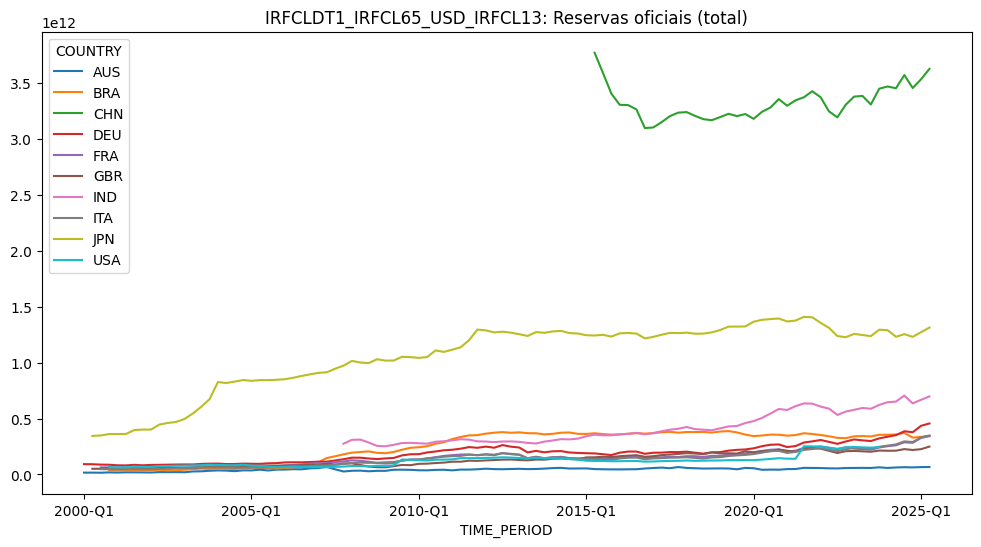

/home/mateus/Documentos/Faculdade/bancos2/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


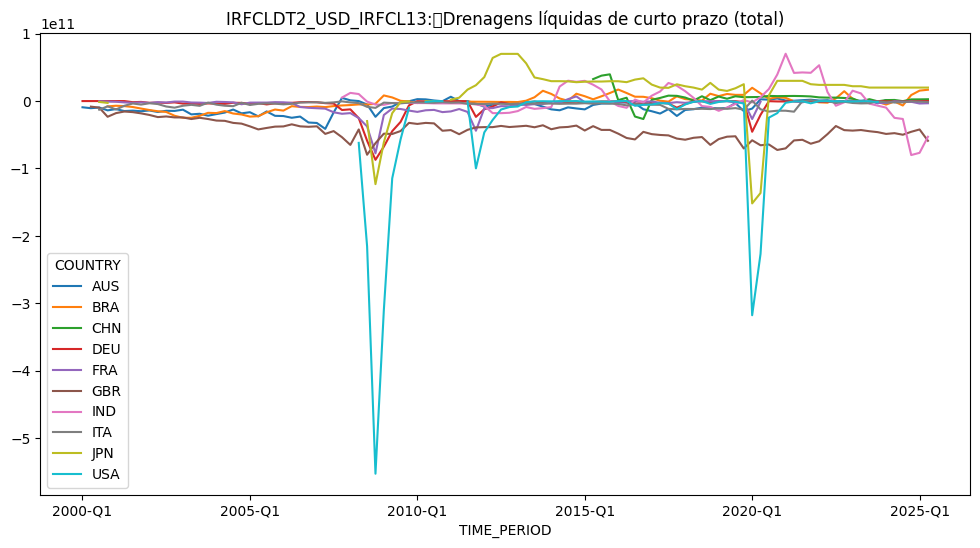

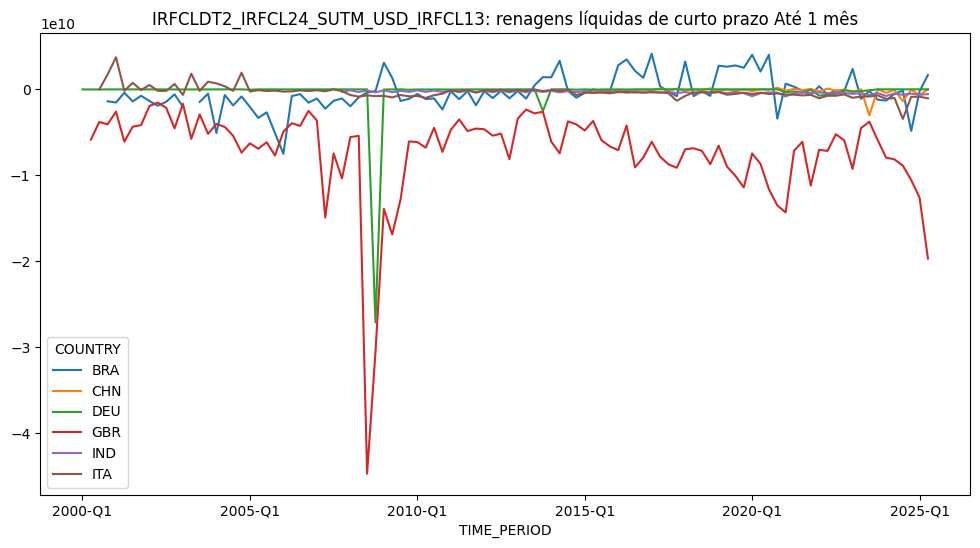

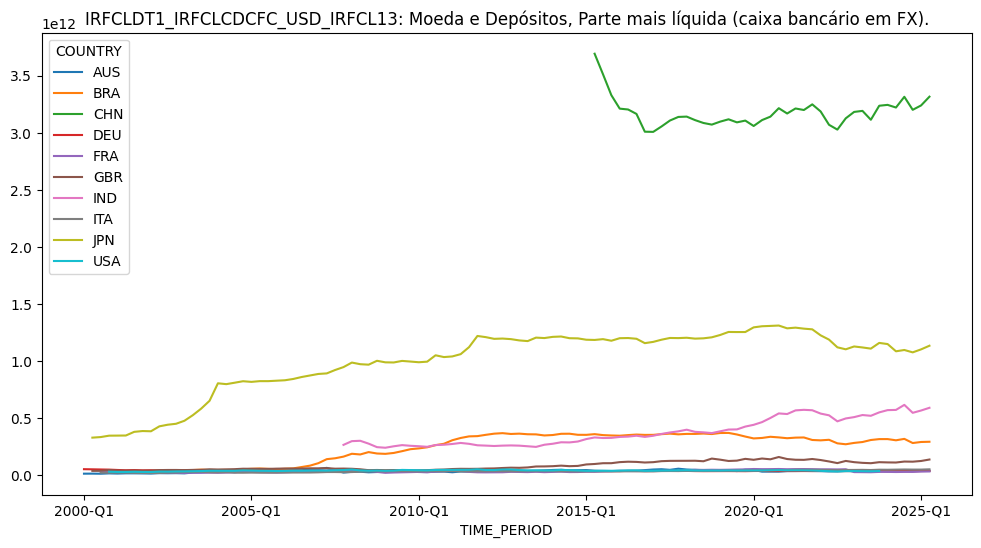

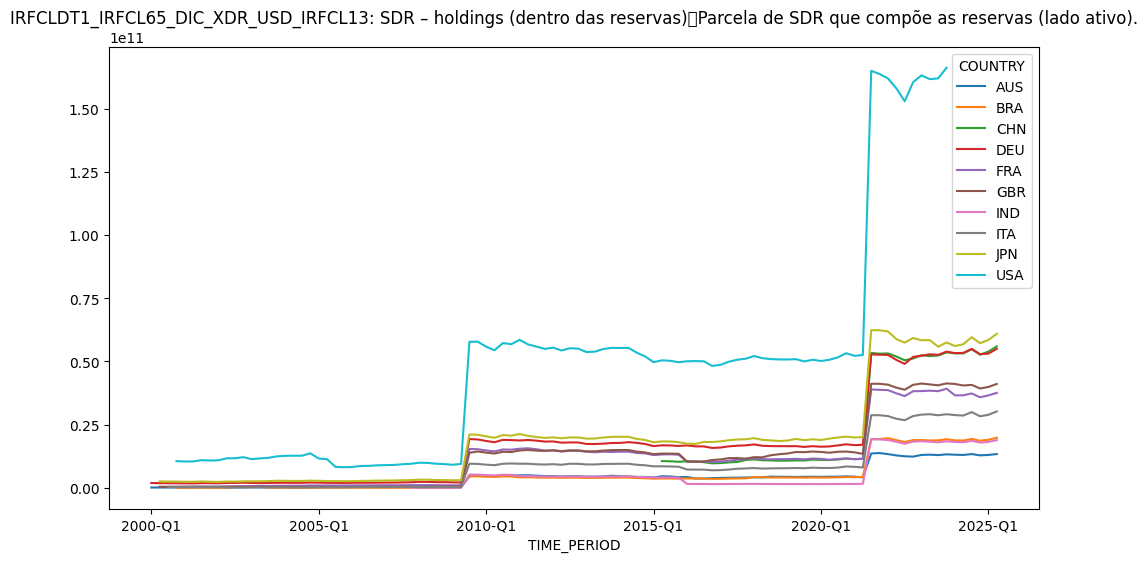

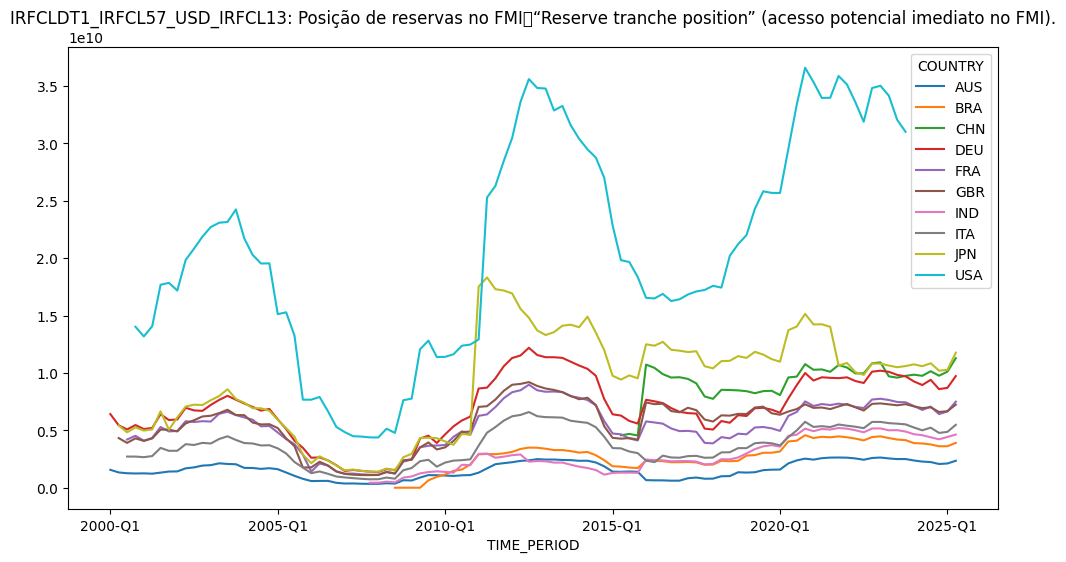

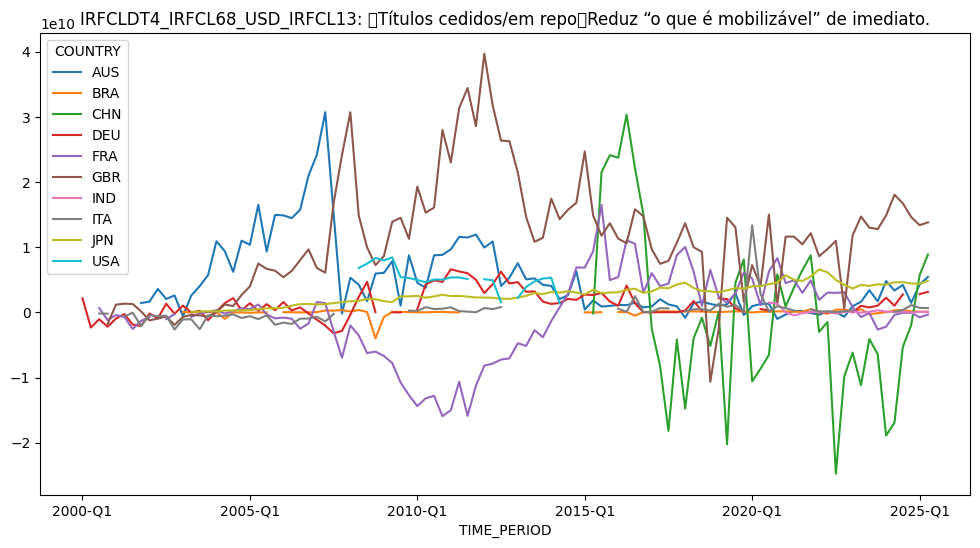

In [35]:
for indicador_sign in indicadores:
    indicador = indicador_sign.split(':')[0]
    df_filtrado = irfcl_null[(irfcl_null['INDICATOR']== indicador) & (irfcl_null['COUNTRY'].isin(paises))]

    # display(teste['TIME_PERIOD'])
    pivot_filtrado = df_filtrado.pivot_table(
        values='value',
        index='TIME_PERIOD',
        columns='COUNTRY',
    )

    pivot_filtrado.plot(figsize=(12,6), title=indicador_sign)



## 1) **Reservas oficiais (total)** — `IRFCLDT1_IRFCL65_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** no topo com folga. Pico ~2014–2015, queda 2015–2016 (defesa do RMB), depois estabilização/reacúmulo gradual até 2025.
* **JPN** é o segundo maior, trajetória ascendente até ~2020, depois acomodação/leve serrilha.
* **IND** com **tendência forte de acumulação** desde ~2017–2018; destaque positivo.
* **DEU/FRA/GBR/ITA** e **CAN/AUS/USA** em patamares bem menores (o que não é “ruim” por si só; moedas fortes e acesso a linhas reduzem a necessidade de estoques gigantes).


## 2) **Drenagens líquidas (total)** — `IRFCLDT2_USD_IRFCL13`

**O que o gráfico mostra**

* Séries oscilando ao redor de zero, com **mergulhos** (outflows projetados).
* **USA** tem mergulho **extremo** ~2008–2009 e outro ~2020Q1–Q2 (crises global/Covid).
* **JPN** exibe **picos positivos** (inflows) ~2010–2013 e ~2020–2021, sugerindo janelas de rolagem favoráveis.
* **GBR** mostra quedas mais largas em vários momentos (maior sensibilidade de funding em USD/GBP?).


## 3) **Drenagens ≤ 1 mês** — `IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13`

**O que o gráfico mostra**

* **GBR** tem **sequência de outflows imediatos** (negativos), com **grande cavado ~2008–2009** e nova piora recente (2023–2025).
* **DEU** também com forte cavado ~2008–2009.
* **CAN** apresenta pequenas a moderadas ondas negativas; **CHN/ITA/IND** ficam perto de zero na maior parte do tempo (perfil menos “nervoso” no bucket de 1 mês).


## 4) **Moeda e Depósitos (Caixa)** — `IRFCLDT1_IRFCLCDCFC_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** e **JPN** têm **caixa elevado** (espelhando parte do nível de reservas).
* **IND** cresceu bastante o caixa desde ~2018–2019 (consistente com o aumento do estoque total).
* **FRA** também melhora caixa nos últimos anos.
* **USA/DEU/GBR/CAN/AUS/ITA** mantêm níveis modestos de caixa (normal para moedas hard/mercados profundos, mas ainda assim relevante).

## 5) **SDR holdings** — `IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13`

**O que o gráfico mostra**

* **Saltos marcantes ~2009–2010** e **~2021** (grandes alocações de SDR do FMI).
* **USA** tem patamar de SDR muito acima dos demais; **JPN** e **CHN** também se destacam no pós-2021.
* Todos os países sobem em 2021 (ampliação universal de “munição potencial”).


## 6) **Reserve Tranche Position (Tranche no FMI)** — `IRFCLDT1_IRFCL57_USD_IRFCL13`

**O que o gráfico mostra**

* **USA** muito acima, com ciclos e **picos ~2011–2014** e **~2021–2022**.
* **JPN** tem um **degrau alto** ~2010–2011 e pico ~2021; **CHN** sobe gradualmente após 2011.
* Europa (DEU/FRA/ITA/GBR) sobe após 2010, cai ~2016 e volta a subir ~2021.


## 7) **Títulos cedidos / em repo** — `IRFCLDT4_IRFCL68_USD_IRFCL13`

**O que o gráfico mostra**

* **CHN** exibe **alta volatilidade** recente, inclusive valores muito positivos (~2015–2016) e depois **sequência de valores negativos** (2018–2024).
* **GBR** tem **picos positivos** grandes ~2010–2016 (muita atividade de *securities lending*/repo).
* **AUS** tem pico grande no começo dos anos 2000.
* **ITA** ficou **claramente negativa ~2008–2012** (parte das reservas “presa”).
* **USA/DEU/FRA/JPN** variam em torno de zero/positivos modestos.


# Síntese por país

* **CHN**: Estoque enorme, **caixa alto**, SDR pós-2021 robusto; teve defesa do câmbio 2015–16; **repo volátil** recente 
* **JPN**: Estoque elevado, caixa alto, tranche/SDR fortes, episódios de drenagens grandes em 2020 mas com **inflows** em outros períodos
* **IND**: Trajetória de **acumulação** + caixa crescente + SDR pós-2021; **perfil saudável** nas métricas, mas cheque **D e D1M** nos choques 2020–2022.
* **USA**: Reservas pequenas (não é problema per se), **SDR e tranche** muito fortes; drenagens violentas em 2008/2020; **swap lines** e credibilidade compensam o estoque baixo.
* **GBR**: D1M **recorrentemente negativo** e **repo** alto em fases; exige atenção em **Cobertura ≤1M** e **R – Repo**.
* **DEU/FRA/ITA**: Estoques médios/baixos; **ITA** teve **repo negativo** longo (~2008–2012); convém usar **reservas ajustadas** e vigiar D1M.



In [36]:
irfcl_null

,COUNTRY,INDICATOR,SECTOR,FREQUENCY,TIME_PERIOD,value,index
0,USA,IRFCLDT1_IRFCL65_USD_IRFCL13,S1XS1311,Q,2000-Q4,6.693000e+10,NaN
1,USA,IRFCLDT1_IRFCL65_USD_IRFCL13,S1XS1311,Q,2001-Q1,6.371900e+10,NaN
2,USA,IRFCLDT1_IRFCL65_USD_IRFCL13,S1XS1311,Q,2001-Q2,6.435500e+10,NaN
3,USA,IRFCLDT1_IRFCL65_USD_IRFCL13,S1XS1311,Q,2001-Q3,7.038200e+10,NaN
4,USA,IRFCLDT1_IRFCL65_USD_IRFCL13,S1XS1311,Q,2001-Q4,6.862100e+10,NaN
...,...,...,...,...,...,...,...
107800,EGY,IRFCLDT4_IRFCL69X_USD_IRFCL13,S1XS1311,Q,2024-Q1,1.804850e+10,NaN
107801,EGY,IRFCLDT4_IRFCL69X_USD_IRFCL13,S1XS1311,Q,2024-Q2,2.371580e+10,NaN
107802,EGY,IRFCLDT4_IRFCL69X_USD_IRFCL13,S1XS1311,Q,2024-Q3,2.311540e+10,NaN
107803,EGY,IRFCLDT4_IRFCL69X_USD_IRFCL13,S1XS1311,Q,2024-Q4,2.283300e+10,NaN


In [37]:
indicadores_nome = {
    "IRFCLDT1_IRFCL65_USD_IRFCL13": "Reservas_oficiais",
    "IRFCLDT1_IRFCL54_USD_IRFCL13": "Reservas_amplas",
    "IRFCLDT1_IRFCL56_USD_IRFCL13": "Reservas_ouro",
    "IRFCLDT1_IRFCL57_USD_IRFCL13": "Posição_FMI",
    "IRFCLDT1_IRFCL65_DIC_XDR_USD_IRFCL13": "SDR_holdings",
    "IRFCLDT1_IRFCL32_USD_IRFCL13": "Reservas_titulos",
    "IRFCLDT1_IRFCLCDCFC_USD_IRFCL13": "Moeda_depositos",

    "IRFCLDT2_USD_IRFCL13": "Drenagem_total",
    "IRFCLDT2_IRFCL24_SUTM_USD_IRFCL13": "Drenagem_1M",
    "IRFCLDT2_IRFCL24_SM1MUT3M_USD_IRFCL13": "Drenagem_1a3M",
    "IRFCLDT2_IRFCL24_SM3MUTY_USD_IRFCL13": "Drenagem_3a12M",

    "IRFCLDT2_IRFCL26_SUTM_FO_USD_IRFCL13": "Principal_1M",
    "IRFCLDT2_IRFCL26_SM1MUT3M_FO_USD_IRFCL13": "Principal_1a3M",
    "IRFCLDT2_IRFCL26_SM3MUTY_FO_USD_IRFCL13": "Principal_3a12M",
    "IRFCLDT2_IRFCL151_SUTM_FO_USD_IRFCL13": "Juros_1M",
    "IRFCLDT2_IRFCL151_SM1MUT3M_FO_USD_IRFCL13": "Juros_1a3M",
    "IRFCLDT2_IRFCL151_SM3MUTY_FO_USD_IRFCL13": "Juros_3a12M",

    "IRFCLDT2_IRFCL1_SUTM_IN_LP_USD_IRFCL13": "Forwards_inflow",
    "IRFCLDT2_IRFCL1_SUTM_SHP_USD_IRFCL13": "Forwards_outflow",
    "IRFCLDT4_IRFCLU97_A_USD_IRFCL13": "Derivativos_net",

    "IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13": "SDR_moedas",
    "IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13": "Moedas_outros",
    "IRFCLDT4_IRFCL68_USD_IRFCL13": "Titulos_repo",
    "IRFCLDT4_IRFCL69X_USD_IRFCL13": "Repo_memorando"
}


In [38]:
USA = irfcl_null[irfcl_null['COUNTRY'] == 'USA']
USA = USA.drop(columns='index')
grupos = USA.groupby(['COUNTRY','INDICATOR'])

lista_dfs = []
merge_final = pd.DataFrame()

for i,valor in enumerate(grupos):
    chave, df = valor
    nome = indicadores_nome.get(chave[1])
    df = df.rename(columns={'value': (f'value_{nome}'),'INDICATOR':(f"INDICATOR_{nome}")})
    
    if i == 0:
        merge_final = df.copy()
    else:
        merge_final = pd.merge(merge_final, df, on=['COUNTRY', 'TIME_PERIOD','SECTOR','FREQUENCY'], how='outer')

lista_dfs.append(merge_final)

  

In [ ]:
lista_dfs = []
merge_final = pd.DataFrame()

irfcl_null = irfcl_null[irfcl_null.SECTOR == "S1XS1311"]

for pais in irfcl_null.COUNTRY.unique():
    df_filtrado = irfcl_null[irfcl_null['COUNTRY'] == pais]
    df_filtrado = df_filtrado.drop(columns='index')
    grupos = df_filtrado.groupby(['COUNTRY','INDICATOR'])

    for i,valor in enumerate(grupos):
        chave, df = valor
        nome = indicadores_nome.get(chave[1])
        df = df.rename(columns={'value': (f'value_{nome}'),'INDICATOR':(f"INDICATOR_{nome}")})
        
        if i == 0:
            merge_final = df.copy()
        else:
            merge_final = pd.merge(merge_final, df, on=['COUNTRY', 'TIME_PERIOD','SECTOR','FREQUENCY'], how='outer')

    lista_dfs.append(merge_final)

df_final = pd.concat(lista_dfs, ignore_index=True)

  

In [40]:
display(df_final)

,COUNTRY,INDICATOR_Reservas_titulos,SECTOR,FREQUENCY,TIME_PERIOD,value_Reservas_titulos,INDICATOR_Reservas_amplas,value_Reservas_amplas,INDICATOR_Reservas_ouro,value_Reservas_ouro,...,INDICATOR_SDR_moedas,value_SDR_moedas,INDICATOR_Moedas_outros,value_Moedas_outros,INDICATOR_Titulos_repo,value_Titulos_repo,INDICATOR_Repo_memorando,value_Repo_memorando,INDICATOR_Derivativos_net,value_Derivativos_net
0,USA,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2000-Q4,1.650200e+10,IRFCLDT1_IRFCL54_USD_IRFCL13,6.693000e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.104600e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,6.693000e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,NaN,IRFCLDT4_IRFCL68_USD_IRFCL13,NaN,NaN,NaN,IRFCLDT4_IRFCLU97_A_USD_IRFCL13,NaN
1,USA,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2001-Q1,1.573800e+10,IRFCLDT1_IRFCL54_USD_IRFCL13,6.371900e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.104600e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,6.371900e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,NaN,IRFCLDT4_IRFCL68_USD_IRFCL13,NaN,NaN,NaN,IRFCLDT4_IRFCLU97_A_USD_IRFCL13,NaN
2,USA,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2001-Q2,1.565100e+10,IRFCLDT1_IRFCL54_USD_IRFCL13,6.435500e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.104400e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,6.435500e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,NaN,IRFCLDT4_IRFCL68_USD_IRFCL13,NaN,NaN,NaN,IRFCLDT4_IRFCLU97_A_USD_IRFCL13,NaN
3,USA,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2001-Q3,1.658700e+10,IRFCLDT1_IRFCL54_USD_IRFCL13,7.038200e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.104400e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,7.038200e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,NaN,IRFCLDT4_IRFCL68_USD_IRFCL13,NaN,NaN,NaN,IRFCLDT4_IRFCLU97_A_USD_IRFCL13,NaN
4,USA,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2001-Q4,1.603500e+10,IRFCLDT1_IRFCL54_USD_IRFCL13,6.862100e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.104500e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,6.862100e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,NaN,IRFCLDT4_IRFCL68_USD_IRFCL13,NaN,NaN,NaN,IRFCLDT4_IRFCLU97_A_USD_IRFCL13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,EGY,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2024-Q1,5.137000e+08,IRFCLDT1_IRFCL54_USD_IRFCL13,5.183660e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,9.003100e+09,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,3.683810e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,1.397500e+09,IRFCLDT4_IRFCL68_USD_IRFCL13,1.352130e+10,IRFCLDT4_IRFCL69X_USD_IRFCL13,1.804850e+10,NaN,NaN
4106,EGY,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2024-Q2,4.695000e+08,IRFCLDT1_IRFCL54_USD_IRFCL13,5.904670e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,9.485400e+09,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,4.286400e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,1.405100e+09,IRFCLDT4_IRFCL68_USD_IRFCL13,1.958250e+10,IRFCLDT4_IRFCL69X_USD_IRFCL13,2.371580e+10,NaN,NaN
4107,EGY,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2024-Q3,4.748000e+08,IRFCLDT1_IRFCL54_USD_IRFCL13,5.894940e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.072320e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,4.310270e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,1.429100e+09,IRFCLDT4_IRFCL68_USD_IRFCL13,1.898210e+10,IRFCLDT4_IRFCL69X_USD_IRFCL13,2.311540e+10,NaN,NaN
4108,EGY,IRFCLDT1_IRFCL32_USD_IRFCL13,S1XS1311,Q,2024-Q4,4.728000e+08,IRFCLDT1_IRFCL54_USD_IRFCL13,5.875770e+10,IRFCLDT1_IRFCL56_USD_IRFCL13,1.064350e+10,...,IRFCLDT4_IRFCL11_DIC_XDRB_USD_IRFCL13,4.351730e+10,IRFCLDT4_IRFCL11_DIC_XXDR_USD_IRFCL13,1.404000e+09,IRFCLDT4_IRFCL68_USD_IRFCL13,2.283300e+10,IRFCLDT4_IRFCL69X_USD_IRFCL13,2.283300e+10,NaN,NaN
